Root Mean Square Error for M=0:55.62287520856701
Root Mean Square Error for M=1:53.77283866902993
Root Mean Square Error for M=2:28.491239299489813
Root Mean Square Error for M=3:20.993855995451245
Root Mean Square Error for M=4:6.025820376031074
Root Mean Square Error for M=5:5.2297372513875064
Root Mean Square Error for M=6:5.089281088633635
Root Mean Square Error for M=7:4.698322039383037
Root Mean Square Error for M=8:4.676583516582949
Root Mean Square Error for M=9:4.669799870651431
Root Mean Square Error for M=10:4.616500904873091
Root Mean Square Error for M=11:3.3096047057251363
Root Mean Square Error for M=12:3.191099947594241
Root Mean Square Error for M=13:3.058037277484339


C:\Users\rahma\AppData\Local\Temp\ipykernel_2656\3525566666.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,5))


Root Mean Square Error for M=14:2.77765540088709
Root Mean Square Error for M=15:2.7668624289129715
Root Mean Square Error for M=16:2.6129476273324372
Root Mean Square Error for M=17:2.277041957851726
Root Mean Square Error for M=18:0.49057375646180357
Root Mean Square Error for M=19:7.252236149569866e-07
Root Mean Square Error for M=20:4.286422839098056e-07
Root Mean Square Error for M=21:1.5244620605831337e-06
Root Mean Square Error for M=22:6.104913611460232e-07
Root Mean Square Error for M=23:2.794477454019884e-06
Root Mean Square Error for M=24:5.673388964753744e-06


<Figure size 360x360 with 0 Axes>

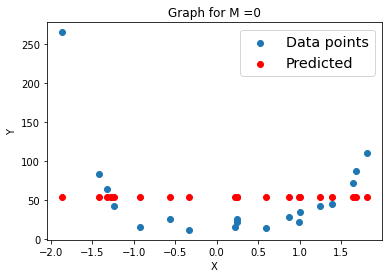

<Figure size 360x360 with 0 Axes>

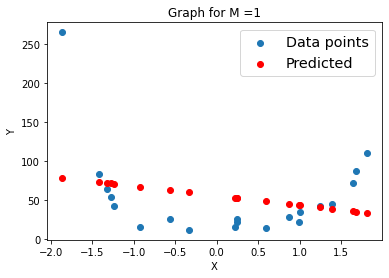

<Figure size 360x360 with 0 Axes>

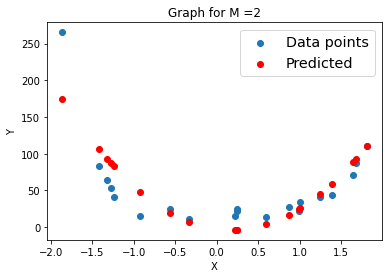

<Figure size 360x360 with 0 Axes>

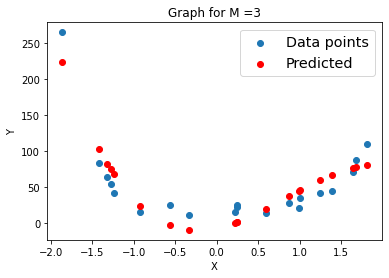

<Figure size 360x360 with 0 Axes>

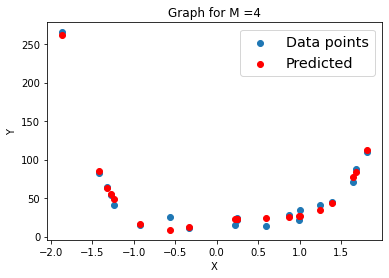

<Figure size 360x360 with 0 Axes>

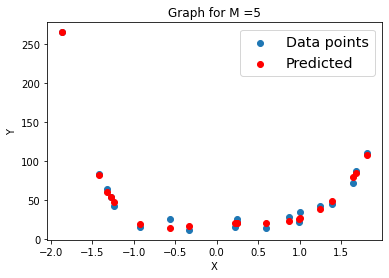

<Figure size 360x360 with 0 Axes>

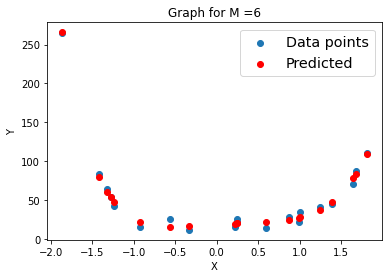

<Figure size 360x360 with 0 Axes>

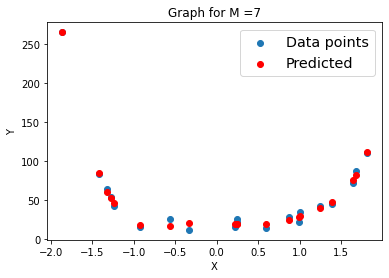

<Figure size 360x360 with 0 Axes>

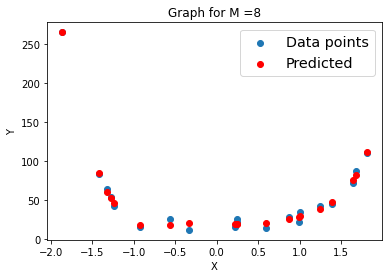

<Figure size 360x360 with 0 Axes>

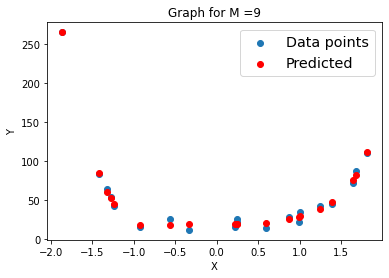

<Figure size 360x360 with 0 Axes>

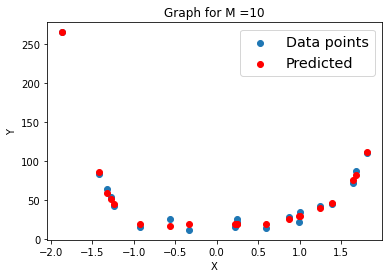

<Figure size 360x360 with 0 Axes>

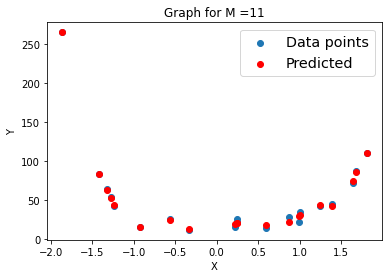

<Figure size 360x360 with 0 Axes>

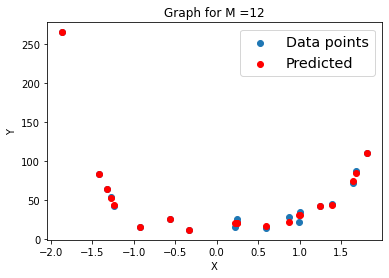

<Figure size 360x360 with 0 Axes>

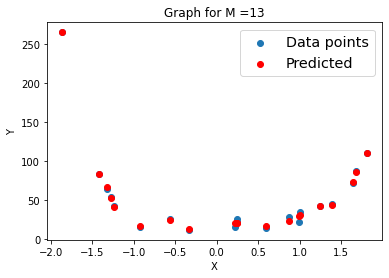

<Figure size 360x360 with 0 Axes>

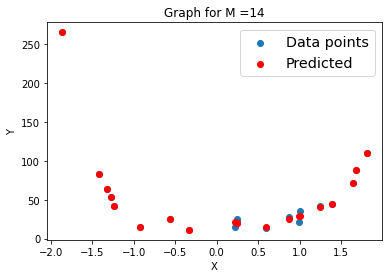

<Figure size 360x360 with 0 Axes>

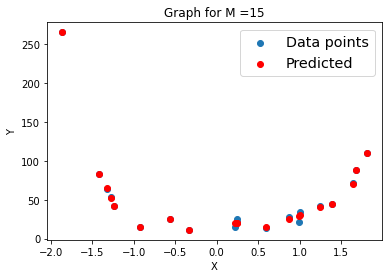

<Figure size 360x360 with 0 Axes>

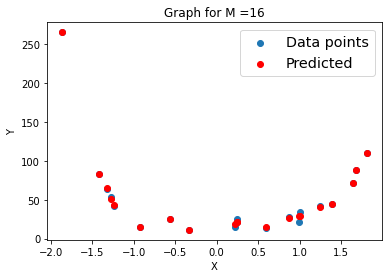

<Figure size 360x360 with 0 Axes>

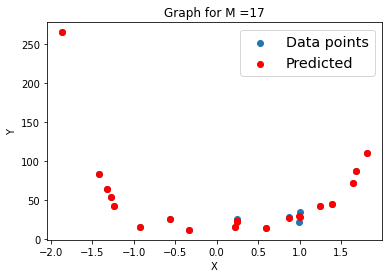

<Figure size 360x360 with 0 Axes>

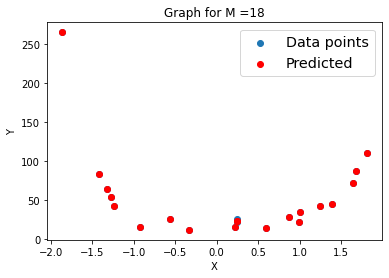

<Figure size 360x360 with 0 Axes>

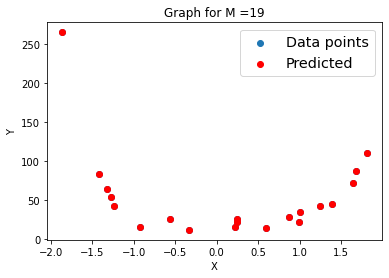

<Figure size 360x360 with 0 Axes>

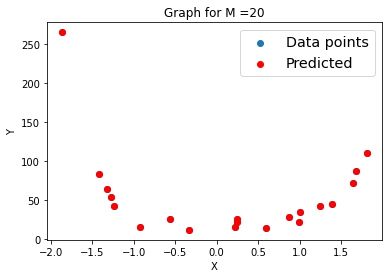

<Figure size 360x360 with 0 Axes>

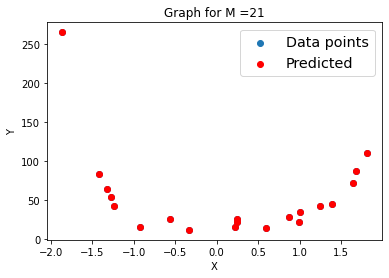

<Figure size 360x360 with 0 Axes>

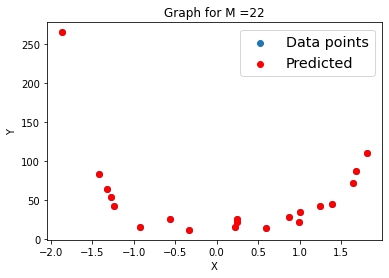

<Figure size 360x360 with 0 Axes>

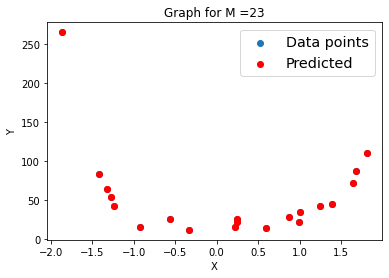

<Figure size 360x360 with 0 Axes>

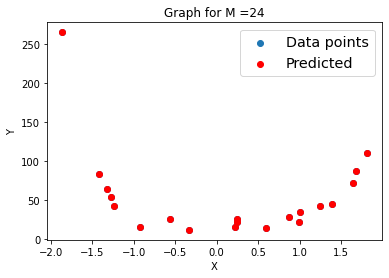

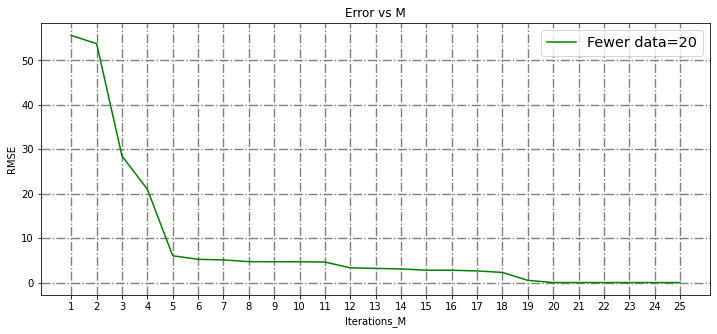

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from scipy.optimize import approx_fprime as gradient
import math
import csv
  
data_train=pd.read_csv('train _extra_1b_xy.csv')
# data_test=pd.read_csv('test.csv')
X=data_train['x']
Y=data_train['y']
X_20=X.loc[0:19]
Y_20=Y.loc[0:19]


# X_20.shape## As the dimension is 100, but linear regression trainning need atleast 1 dimension
# Y_20.shape
# X_20.ndim
# Y_20.ndim ## 1 ...Cant train linear regression model so we need to give dimension
x_train = X_20.values.reshape(-1,1)
y_train = Y_20.values.reshape(-1,1)
x_full = X.values.reshape(-1,1)
y_full = Y.values.reshape(-1,1)



M=25 ## Just Change this M value to iterate for more higher polynomial
Mean_square_error=[]
design_matrix_20=[]
Coefficeint_20=[]
optimal_weights=[]
for i in range(M):
        polynomial_features = PolynomialFeatures(degree = i)
        X_poly = polynomial_features.fit_transform(x_train)
        design_matrix_20.append(X_poly)
        polynomial_reg_model_20=LinearRegression()
        polynomial_reg_model_20.fit(X_poly,y_train)
        Coefficeint_20.append(polynomial_reg_model_20.coef_)
        y_predicted = polynomial_reg_model_20.predict(X_poly)
        
        
        plt.figure(figsize=(5,5))
        fig, ax = plt.subplots()
        plt.title(f"Graph for M ={i}")
        plt.scatter(X_20,Y_20,label='Data points')
        plt.xlabel("X")
        plt.ylabel("Y")
        
        plt.scatter(X_20,y_predicted,label='Predicted',c="red")
        legend = ax.legend(loc='best', fontsize='x-large')
        plt.show
        MSE = mean_squared_error(Y_20, y_predicted)
        RMSE = math.sqrt(MSE)
        Mean_square_error.append(RMSE)
        print(f"Root Mean Square Error for M={i}:{RMSE}")
        
        #Optimisation(analystical_penrose_mooresir)
        design_matrix=X_poly
        transpose=np.transpose(design_matrix)
        dot_product=(np.dot(transpose,design_matrix))
        inverse=np.linalg.inv(dot_product)
        pseudo=np.dot(inverse,transpose)
        w_ml=np.dot(transpose,Y_20)
        optimal_weights.append(w_ml)



Iterations_M= (np.linspace(1,M,num=M,dtype="int"))
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(Iterations_M, Mean_square_error, 'green',label='Fewer data=20')
plt.title("Error vs M")
plt.xlabel('Iterations_M')
plt.ylabel('RMSE')
plt.xticks(np.arange(1,M+1))
plt.grid(True, color = "grey", linewidth = "1.4", linestyle = "-.") 
legend = ax.legend(loc='best', fontsize='x-large')
plt.show()

[3.21873423e-11]


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 720x720 with 0 Axes>

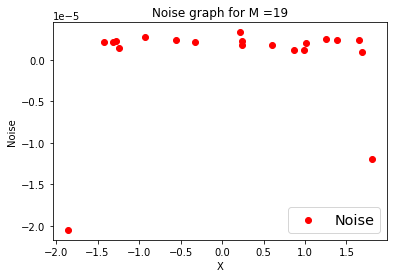

In [39]:
## Noise for overfitting case
noise19=y_train-y_predicted
noise_variance19=sum((noise19)**2)/20
rounded_noise=np.round(noise_variance19,5)
print(noise_variance19)
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
plt.title(f"Noise graph for M ={19}")
plt.xlabel("X")
plt.ylabel("Noise")
plt.scatter(X_20,noise19,label='Noise',c="red")
legend = ax.legend(loc='best', fontsize='x-large')
plt.show

Root Mean Square Error for M=0:70.09721538978584
Root Mean Square Error for M=1:67.22070491028734
Root Mean Square Error for M=2:33.696388497087085
Root Mean Square Error for M=3:25.181823338879145
Root Mean Square Error for M=4:8.752391253783841
Root Mean Square Error for M=5:8.455902961555978
Root Mean Square Error for M=6:7.842903432512381
Root Mean Square Error for M=7:7.812639922861118
Root Mean Square Error for M=8:7.638369766057252
Root Mean Square Error for M=9:7.636777019339523


C:\Users\rahma\AppData\Local\Temp\ipykernel_2656\439189069.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,5))


Root Mean Square Error for M=10:7.62929718421274
Root Mean Square Error for M=11:7.620062209143198
Root Mean Square Error for M=12:7.52380827313197
Root Mean Square Error for M=13:7.5128208741310285
Root Mean Square Error for M=14:7.512663953767145
Root Mean Square Error for M=15:7.491635058511046
Root Mean Square Error for M=16:7.36965452119486
Root Mean Square Error for M=17:7.272401587251576
Root Mean Square Error for M=18:7.262883659153096
Root Mean Square Error for M=19:7.241318293121961
Root Mean Square Error for M=20:7.2304404432774385
Root Mean Square Error for M=21:7.2215269431203435
Root Mean Square Error for M=22:7.110641346616533
Root Mean Square Error for M=23:6.9779650383885325
Root Mean Square Error for M=24:6.969461531214416


<Figure size 360x360 with 0 Axes>

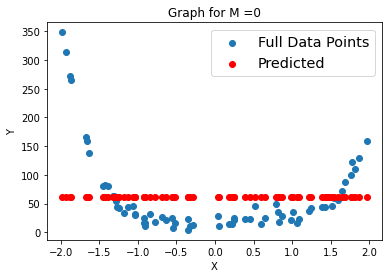

<Figure size 360x360 with 0 Axes>

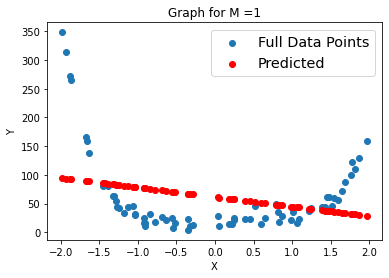

<Figure size 360x360 with 0 Axes>

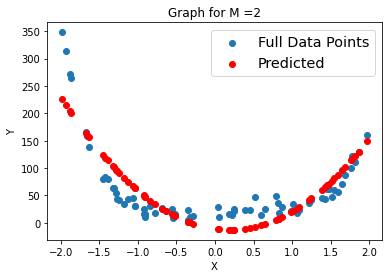

<Figure size 360x360 with 0 Axes>

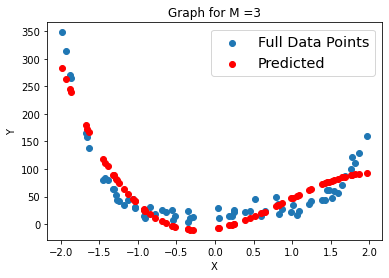

<Figure size 360x360 with 0 Axes>

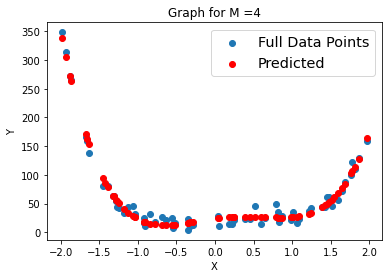

<Figure size 360x360 with 0 Axes>

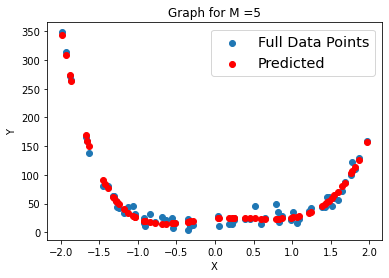

<Figure size 360x360 with 0 Axes>

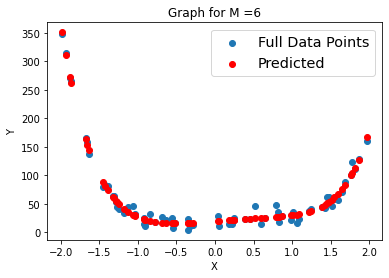

<Figure size 360x360 with 0 Axes>

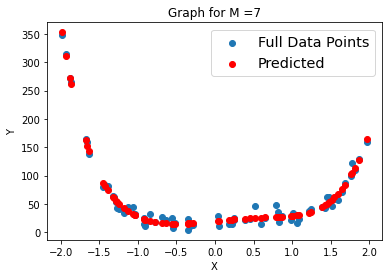

<Figure size 360x360 with 0 Axes>

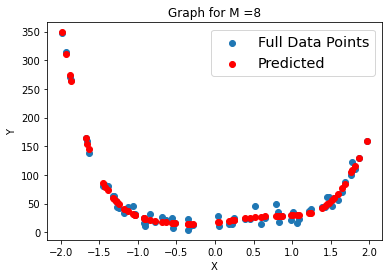

<Figure size 360x360 with 0 Axes>

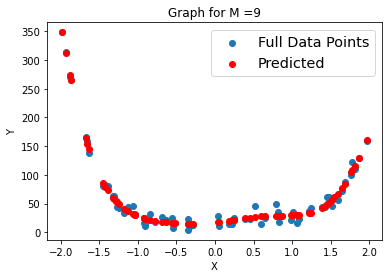

<Figure size 360x360 with 0 Axes>

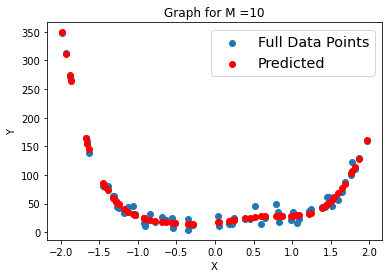

<Figure size 360x360 with 0 Axes>

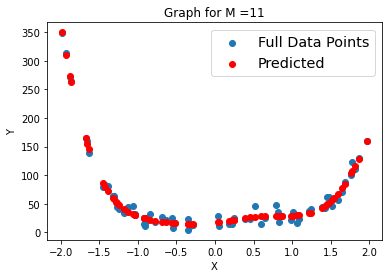

<Figure size 360x360 with 0 Axes>

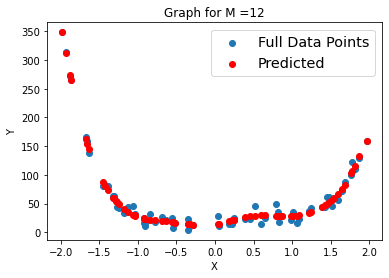

<Figure size 360x360 with 0 Axes>

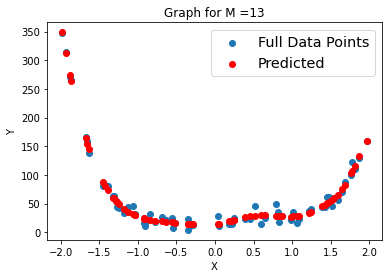

<Figure size 360x360 with 0 Axes>

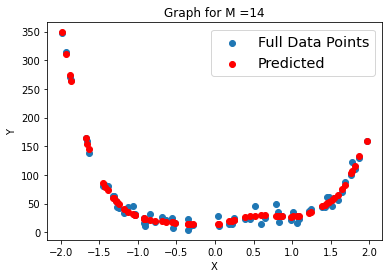

<Figure size 360x360 with 0 Axes>

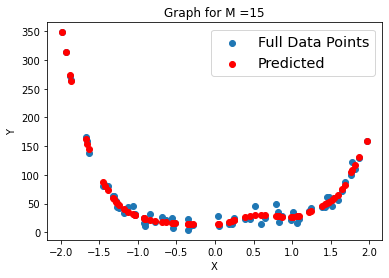

<Figure size 360x360 with 0 Axes>

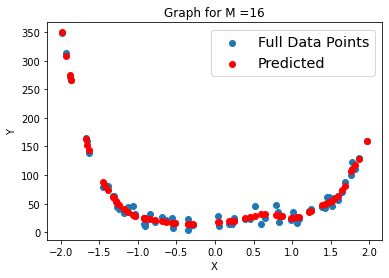

<Figure size 360x360 with 0 Axes>

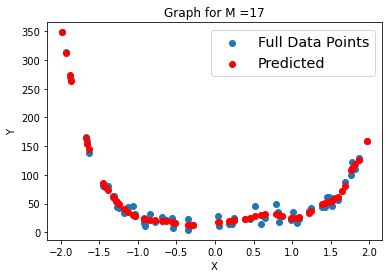

<Figure size 360x360 with 0 Axes>

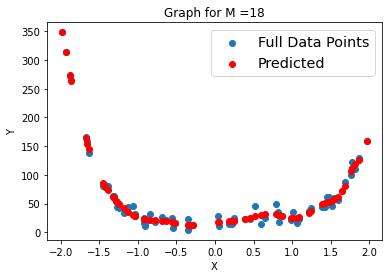

<Figure size 360x360 with 0 Axes>

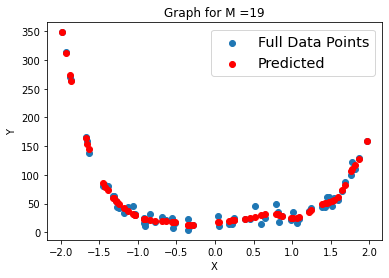

<Figure size 360x360 with 0 Axes>

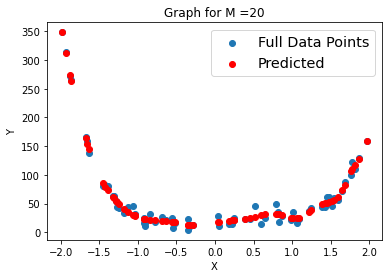

<Figure size 360x360 with 0 Axes>

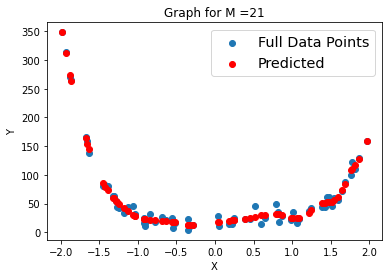

<Figure size 360x360 with 0 Axes>

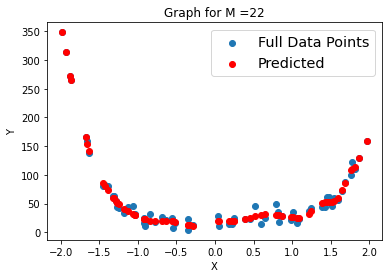

<Figure size 360x360 with 0 Axes>

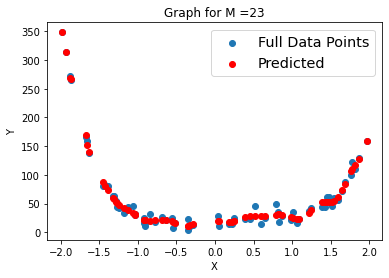

<Figure size 360x360 with 0 Axes>

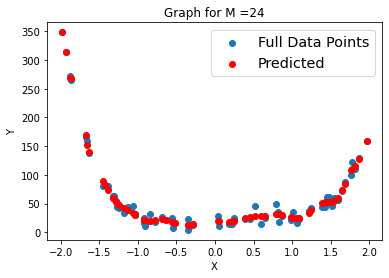

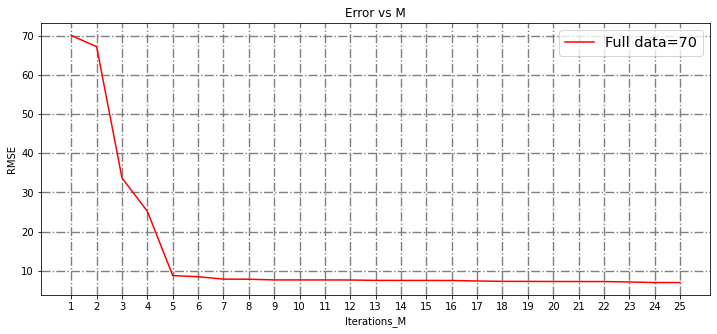

In [40]:
M=25
Mean_square_error_full=[]
design_matrix_70=[]
Coefficeint_70=[]

for i in range(M):
        polynomial_features = PolynomialFeatures(degree = i)
        X_poly_full = polynomial_features.fit_transform(x_full)
        
        polynomial_reg_model_70=LinearRegression()
        polynomial_reg_model_70.fit(X_poly_full,y_full)
        y_predicted_full = polynomial_reg_model_70.predict(X_poly_full)
        design_matrix_70.append(X_poly_full)
        Coefficeint_70.append( polynomial_reg_model_70.coef_)
        
        plt.figure(figsize=(5,5))
        fig, ax = plt.subplots()
        plt.title(f"Graph for M ={i}")
        plt.scatter(X,Y,label='Full Data Points')
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.scatter(X,y_predicted_full,label='Predicted',c="red")
        legend = ax.legend(loc='best', fontsize='x-large')
        plt.show
        MSE_full = mean_squared_error(Y, y_predicted_full)
        RMSE = math.sqrt(MSE_full)
        Mean_square_error_full.append(RMSE)
        print(f"Root Mean Square Error for M={i}:{RMSE}")
Iterations_M_full= (np.linspace(1,M,num=M,dtype="int"))
fig, ax = plt.subplots(figsize = (12, 5))
plt.plot(Iterations_M_full, Mean_square_error_full, 'red',label='Full data=70')
plt.title("Error vs M")
plt.xlabel('Iterations_M')
plt.ylabel('RMSE')
plt.xticks(np.arange(1,M+1))
plt.grid(True, color = "grey", linewidth = "1.4", linestyle = "-.") 
legend = ax.legend(loc='best', fontsize='x-large')
plt.show()

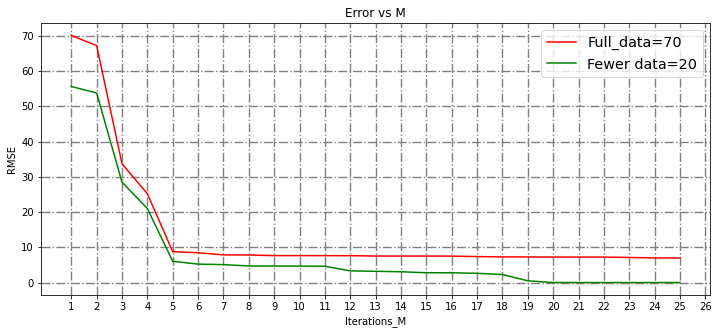

In [41]:

fig, ax = plt.subplots(figsize = (12, 5))
plt.plot(Iterations_M_full, Mean_square_error_full, 'red',label='Full_data=70')
plt.plot(Iterations_M, Mean_square_error, 'green',label='Fewer data=20')
plt.title("Error vs M")
plt.xlabel('Iterations_M')
plt.ylabel('RMSE')
M=26
plt.xticks(np.arange(1,M+1))
plt.grid(True, color = "grey", linewidth = "1.4", linestyle = "-.") 
legend = ax.legend(loc='best', fontsize='x-large')
plt.show()

In [75]:
with open('1B_Design_matrix_20', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
   
    write.writerows(design_matrix_20)

with open('1B_Coefficient_20', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
   
    write.writerows(Coefficeint_20)

with open('1B_Design_matrix_70', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
   
    write.writerows(design_matrix_70)


with open('1B_Coefficient_70', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
   
    write.writerows(Coefficeint_70)

In [42]:
data = np.array(data_train.values)
train_split = 0.8
train_X_st = data[:int(train_split*len(data_train)), 0:1].reshape(-1,1)
train_y_st = data[:int(train_split*len(data_train)), 1:].reshape(-1,1)
test_X_st = data[int(train_split*len(data_train)):, 0:1].reshape(-1,1)
test_y_st = data[int(train_split*len(data_train)):, 1:].reshape(-1,1)
print(train_X_st.shape)

(56, 1)


In [43]:
class polynomial_regression():


    def __init__(self,degrees):
        self.degree = degrees
        self.weights = np.random.randn(degrees+1)
        self.training_loss = []
        self.loss_type = None


    def predict(self, x: float):
        output = 0

        for i in range(len(self.weights)-1):
            output += (x**(i+1) * self.weights[i])

        return output + self.weights[-1]


    def fit(self,X ,y,epochs,lr,loss,ridge=False,reg_rate=0.1):

        training_loss = []

        if loss == 'MSE':
            loss = MSE
            self.loss_type = 'MSE'
        elif loss == 'RMSE':
            loss = RMSE
            self.loss_type = 'RMSE'
        else:
            raise Exception('Undefined loss function')


        for epoch in range(epochs):
           
            self.weights -= lr*gradient(self.weights,
                                        RMSE,
                                        [np.sqrt(np.finfo(float).eps)/100]*len(self.weights),
                                        X,
                                        y,
                                        ridge,
                                        reg_rate
                                       )
            training_loss.append(MSE(self.weights,X,y))
            # print(epoch,training_loss)

        self.training_loss = training_loss
        # print(self.weights)

def MSE(w,X,y,ridge=False,reg_rate=0.1):
    total = 0
    weights = w[:-1]
    bias = w[-1]

    for i in range(len(X)):
        total += (np.dot(weights,[X[i]**(p+1) for p in range(len(weights))]) + bias - y[i])**2

    if ridge == False:
        return (1/len(X)) * total
    else:
        return (1/len(X)) * total + reg_rate*((w**2).sum())


def RMSE(w,X,y,ridge=False, reg_rate = 0.1):
    total = 0
    weights = w[:-1]
    bias = w[-1]

    for i in range(len(X)):
        total += (np.dot(weights,[X[i]**(p+1) for p in range(len(weights))]) + bias - y[i])**2

    if ridge == False:
        return np.sqrt((1/len(X)) * total)

    else:
        return np.sqrt((1/len(X)) * total) + reg_rate*((w**2).sum())


def build_graph_trainning(X,y,model):
    plt.figure(figsize=(10,4))

    #Scatter plot of the dataset and the plot of the model's predictions
    plt.subplot(1,2,1)
    plt.scatter(X,y)
    X.sort()
    plt.scatter(X,model.predict(X),c='red')
    plt.title('Model',size=20)
    plt.show
    #Curve of the training loss
    plt.subplot(1,2,2)
    plt.plot(np.arange(len(model.training_loss)),model.training_loss,label=f'{model.loss_type} loss')
    plt.legend(prop={'size': 20})
    plt.title('Training loss',size=20)

def build_graph_test(X,y,model):
    plt.figure(figsize=(10,4))

    #Scatter plot of the dataset and the plot of the model's predictions
    plt.subplot(1,2,1)
    plt.scatter(X,y)
    X.sort()
    plt.scatter(X,model.predict(X),c='red')
    plt.title('Model_test prediction',size=20)
    plt.show
    

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


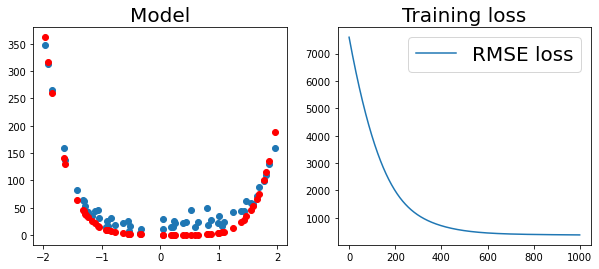

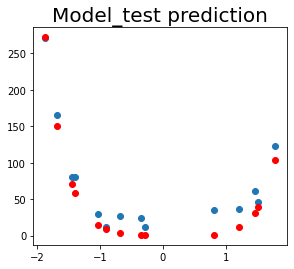

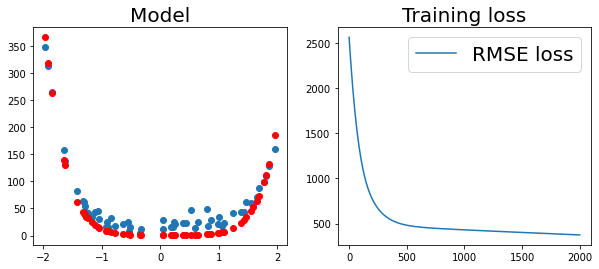

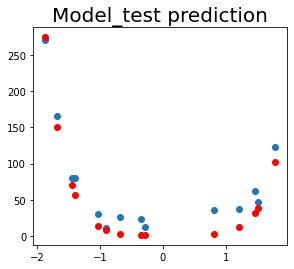

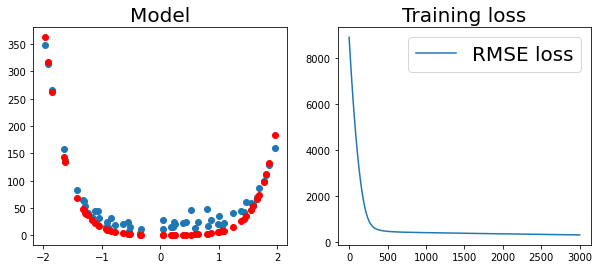

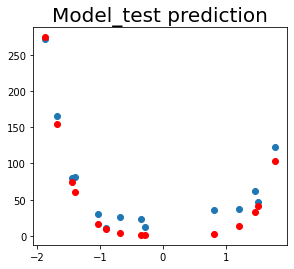

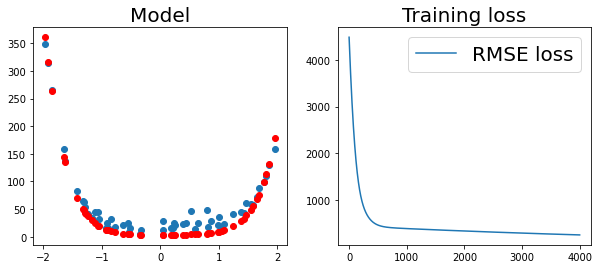

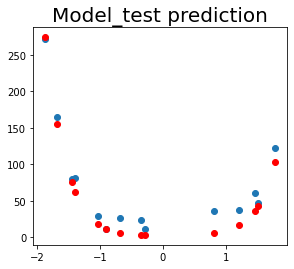

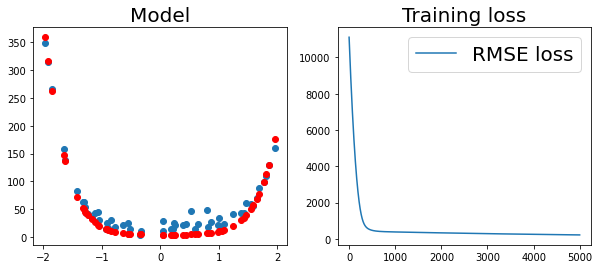

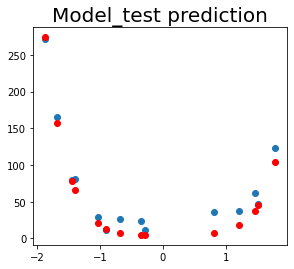

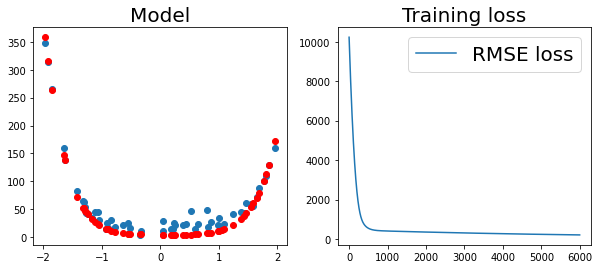

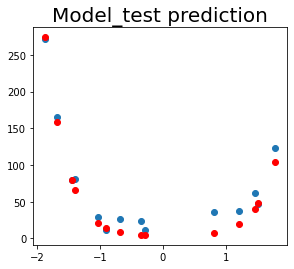

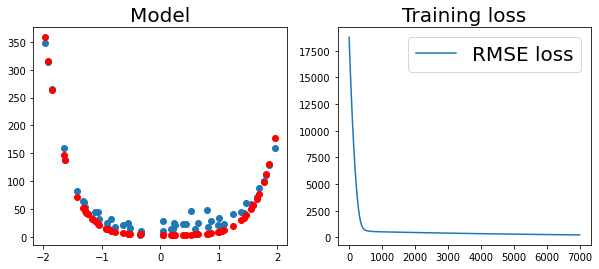

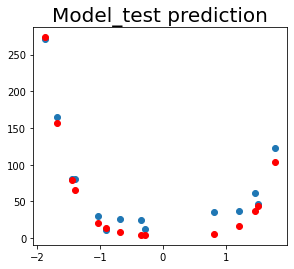

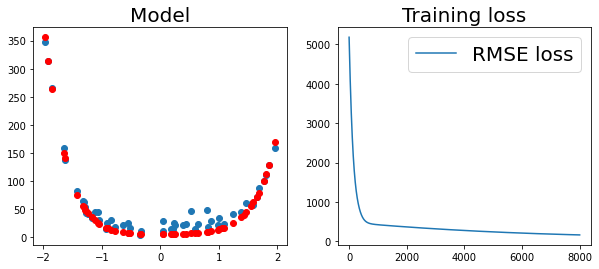

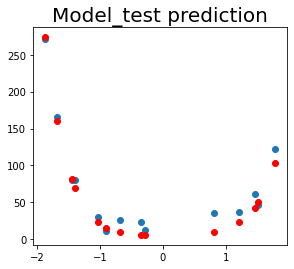

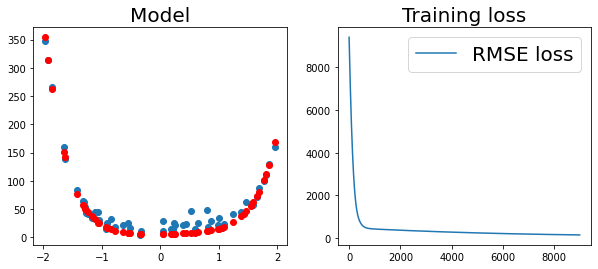

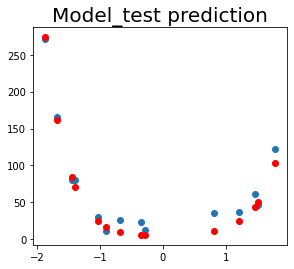

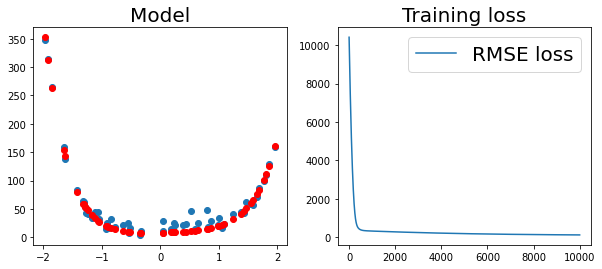

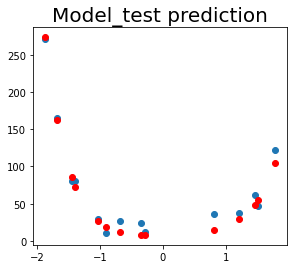

In [44]:
epoch_Iter=np.linspace(1000,10000,10)
epoch_Iter
iteration_epoch=[]
for i in (epoch_Iter):
        print(int(i))
        iteration_epoch.append(int(i))



for i in iteration_epoch:
        degree = 6
        epochs = i
        print(i)
        learning_rate = 0.001


        model = polynomial_regression(degree)
        model.fit(train_X_st,
                train_y_st,
                epochs,
                learning_rate,
                loss='RMSE',
                ridge=False,)
        build_graph_trainning(train_X_st,train_y_st,model)
        build_graph_test(test_X_st,test_y_st,model)

In [45]:
 # holds  70 data points
p = int(len(x_full)*9/10)
data = np.arange(p)
#shuffles the data 
np.random.shuffle(data)

In [46]:
def stochastic_gradient_descent(eta,m,lamb,max_iter,batch_size,col_x,col_t):
    #constructing design_matrix
    P  = design_matrix(col_x,m)
    #initializing matrix with all zeros
    weight = np.zeros((m+1,1))
    
    for i in range(max_iter):
        iter = 0
        for j in range(batch_size):
          y = col_t[data[j]]
          x = P[data[j]] 
          r = x*weight
          iter = iter  + (x.T)*(y-r)
          weight = weight + iter*eta  
        weight = weight + lamb*weight*eta  
    return weight

In [47]:
def design_matrix(x,m):
    n = len(x)
    
    #initializing matrix with all zeros
    Pi = np.matrix(np.zeros((n,m+1),dtype=float))
    
    for j in range(n): 
      for i in range(m+1):
        Pi[j,i] = (x[j])**i
    return Pi

def error(m,cofficent,x,t):
    tp   = result(m,cofficent,x)
    test = np.square((np.subtract(t,tp)))
    Erms = ((np.sum(test))/len(t))**0.5
    return Erms

def result(m,cofficient,col_x):

    return (np.matmul(design_matrix(col_x,m),cofficient))

In [71]:
weight=stochastic_gradient_descent(1/1000,5,10**-20,1000,4,x_full,y_full)
weight

matrix([[10.55692608],
        [ 2.6134792 ],
        [ 9.2856239 ],
        [ 0.94688129],
        [11.65410628],
        [-2.47706711]])

C:\Users\rahma\AppData\Local\Temp\ipykernel_2656\2816482029.py:13: RuntimeWarning: invalid value encountered in add
  iter = iter  + (x.T)*(y-r)
C:\Users\rahma\AppData\Local\Temp\ipykernel_2656\2816482029.py:13: RuntimeWarning: overflow encountered in add
  iter = iter  + (x.T)*(y-r)


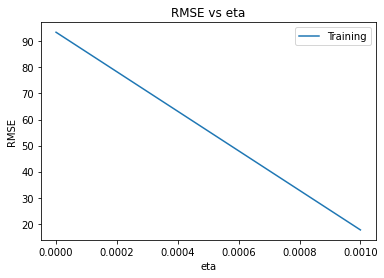

In [61]:
maty = np.zeros((100,2))
for i in range(100):
    maty[i][0] = i/1000
    maty[i][1]=  error(6,stochastic_gradient_descent(i/1000,6,10**-20,4000,4,x_full,y_full),x_full,y_full)
    
fig = plt.figure(5)
plt.plot(maty[:,0:1],maty[:,1:2],label = 'Training')
plt.xlabel('eta')
plt.ylabel('RMSE')
plt.title('RMSE vs eta')
plt.legend()
plt.show()

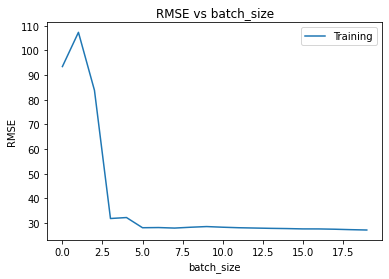

In [ ]:
maty = np.zeros((20,2))
for i in range(20):
    maty[i][0] = i
    maty[i][1]=  error(6,stochastic_gradient_descent(0.001,6,10**-20,5000,i,x_full,y_full),x_full,y_full)
    
fig = plt.figure(6)
plt.plot(maty[:,0:1],maty[:,1:2],label = 'Training')
plt.xlabel('batch_size')
plt.ylabel('RMSE')
plt.title('RMSE vs batch_size')
plt.legend()
plt.show()

[[30703.40272644]
 [ 8846.41948362]
 [ 4502.07012627]
 [ 3062.18053877]
 [ 2704.30139015]
 [ 3515.87251069]
 [ 4194.24460195]
 [ 2694.32829743]
 [ 3458.25643492]
 [ 4029.81524586]
 [ 5138.29658067]
 [ 5080.30026142]
 [ 3831.70954861]
 [ 2705.08531004]]


<Figure size 720x720 with 0 Axes>

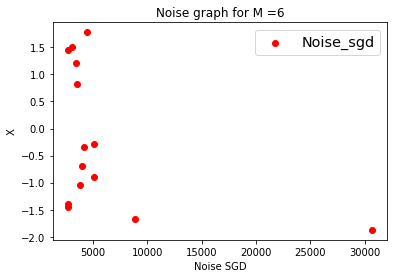

In [74]:
## Noise for overfitting case
noise_sgd_batch=test_y_st-list(result(5,weight,test_X_st))
noise_variance_sgd_batch=sum((noise_sgd_batch)**2)/20
rounded_noise_sgd_batch=np.round(noise_variance_sgd_batch,5)
print(noise_variance_sgd_batch)
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
plt.title(f"Noise graph for M ={6}")
plt.xlabel("Noise SGD")
plt.ylabel("X")
plt.scatter(noise_variance_sgd_batch,test_X_st,label='Noise_sgd',c="red")
legend = ax.legend(loc='best', fontsize='x-large')

In [78]:
np.mean(np.sqrt(rounded_noise_sgd_batch))

71.34560384941986